# House Prices - Prediction Using Random Forest Regression Models 


## Introduction

<p style=" text-align: justify;
  text-justify: inter-word;">In this notebook I applied Random Forest  regression models to predict House Prices. This is part of Kaggle House Prices - Advanced Regression Techniques Challenge. The dataset for the model is taken from <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data">Kaggle.com</a>

<span>Project By: </span><span>Shreyash Nalawade</span>
<a href="https://www.linkedin.com/in/shreyash-nalawade/"><img style="height:20px;" src="https://cdn-icons-png.flaticon.com/512/174/174857.png"></a>


<img src="https://goldenvisasconsultancy.com/wp-content/uploads/2019/08/Real-estate-fundamentals-1-1200x600.jpg">

## Dependencies Setup

In [743]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn as sk
import opendatasets as od
import matplotlib.pyplot as plt 
import matplotlib 

### Matplotlib Setup

In [744]:
plt.rcParams["figure.figsize"]=(20,10)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
color_pallet=sns.color_palette("flare",3)

## EDA- Exploratory Data Analysis

### Downloading Data

In [745]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")

Skipping, found downloaded files in ".\house-prices-advanced-regression-techniques" (use force=True to force download)


### Importing dataset


In [746]:
house_paramas_df=pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")

In [747]:
house_paramas_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Taking care of missing data

In [748]:
nanCols=house_paramas_df.isna().any()
for index in nanCols.index:
    if(nanCols[index]):
        noMissing=house_paramas_df[index].isna().sum()
        if(noMissing>100):
            house_paramas_df.drop(columns=index,axis=0,inplace=True)
house_paramas_df.dropna(axis=0,inplace=True)

In Above code I dropped columns with missing values more than 100 and for the ones with missing values less than 100 all the observations containing missing data were droped

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16776\353600084.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(x=house_paramas_df.mean(axis=0),y=house_paramas_df.mean(axis=0).index);


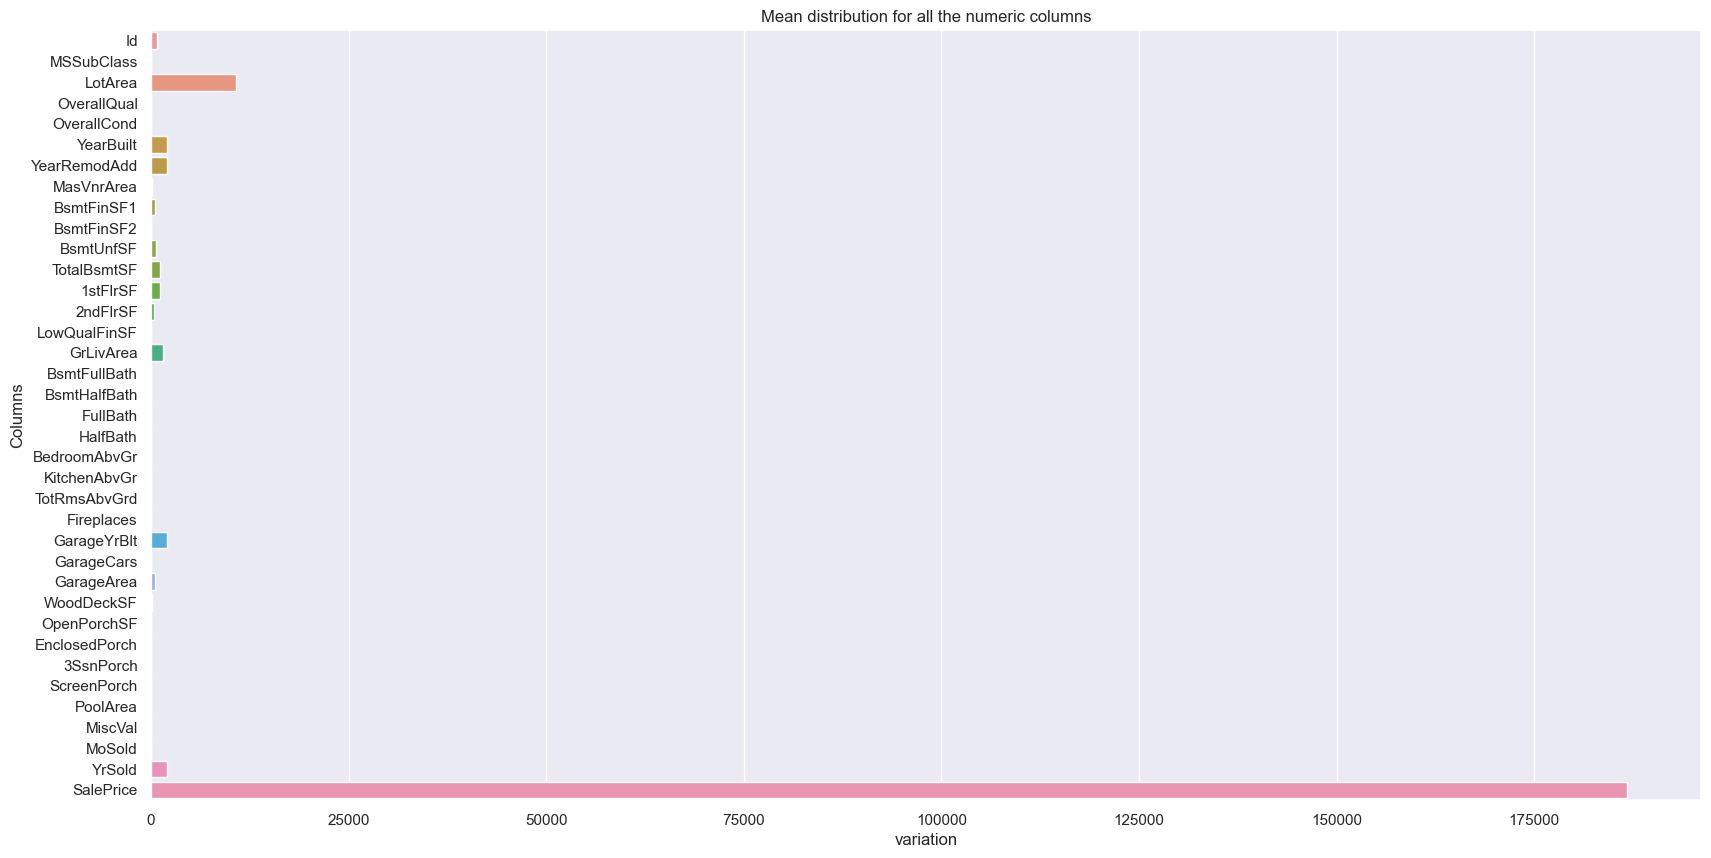

In [749]:
sns.barplot(x=house_paramas_df.mean(axis=0),y=house_paramas_df.mean(axis=0).index);

plt.title("Mean distribution for all the numeric columns");
plt.xlabel("variation")
plt.ylabel("Columns");

### Distribution of Sales Price

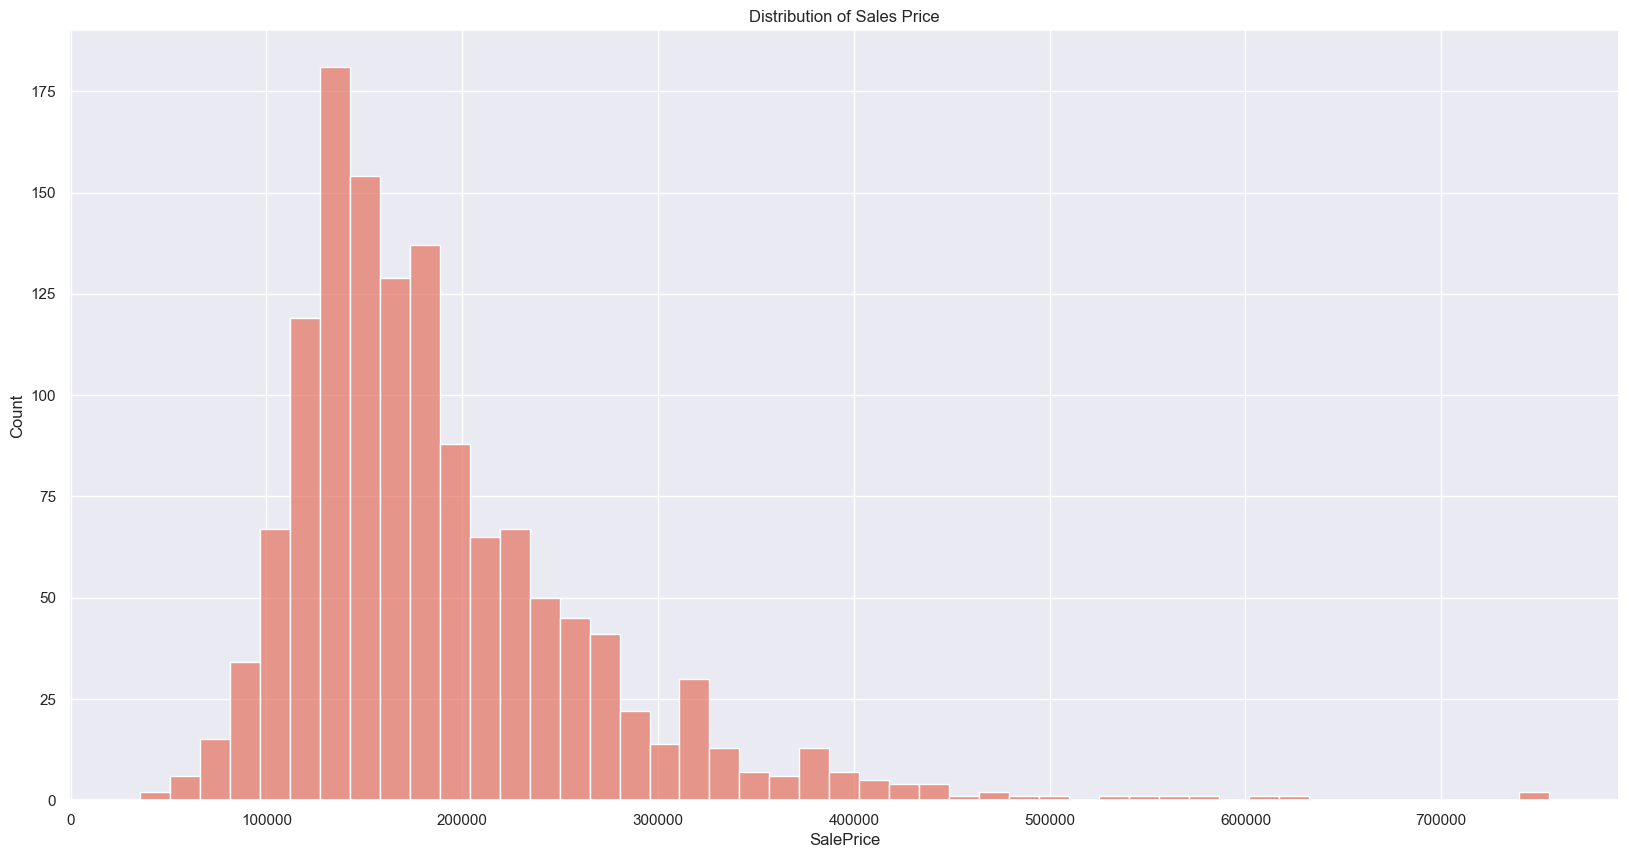

In [750]:
plt.title("Distribution of Sales Price");
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
sns.histplot(house_paramas_df["SalePrice"],color=color_pallet[0],alpha=0.7);

## Feature selection

In [751]:

cols=house_paramas_df.columns
num_cols = house_paramas_df._get_numeric_data().columns    
catList= list(set(cols) - set(num_cols))
catgoricalColumns=house_paramas_df[catList]
house_paramas_df.drop(catList,axis=1,inplace=True)
catgoricalColumns=catgoricalColumns

In [752]:
%%capture
endcoded_df=pd.DataFrame()
for index in catgoricalColumns:
    top10=[x for x in catgoricalColumns[index].value_counts().head(10).index]
    for label in top10:
        endcoded_df[label]=np.where(catgoricalColumns[index]==label,1,0)

In [753]:

y=house_paramas_df.iloc[:,-1].values
house_paramas_df.drop(columns=["SalePrice"],inplace=True)
house_paramas_df.drop(columns="Id",inplace=True)

In [754]:
house_paramas_df.reset_index(inplace=True)
endcoded_df.reset_index(inplace=True)

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_16776\1718223910.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  endcoded_df.reset_index(inplace=True)


In [755]:
house_paramas_df.drop("index",inplace=True,axis=1)

### Feture scaling numeric values 

In [756]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
house_paramas_df = sc.fit_transform(house_paramas_df)

In [757]:
endcoded_df.drop("index",inplace=True,axis=1)
endcoded_df=endcoded_df.iloc[:,:].values

In [758]:
X=np.concatenate((house_paramas_df,endcoded_df),axis=1)

In [759]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=20)

In [760]:
y_pred=regressor.predict(X)

In [761]:
np.concatenate((y.reshape(-1,1),y_pred.reshape(-1,1)),axis=1)

array([[208500., 205470.],
       [181500., 172170.],
       [223500., 224290.],
       ...,
       [266500., 253600.],
       [142125., 143550.],
       [147500., 144775.]])

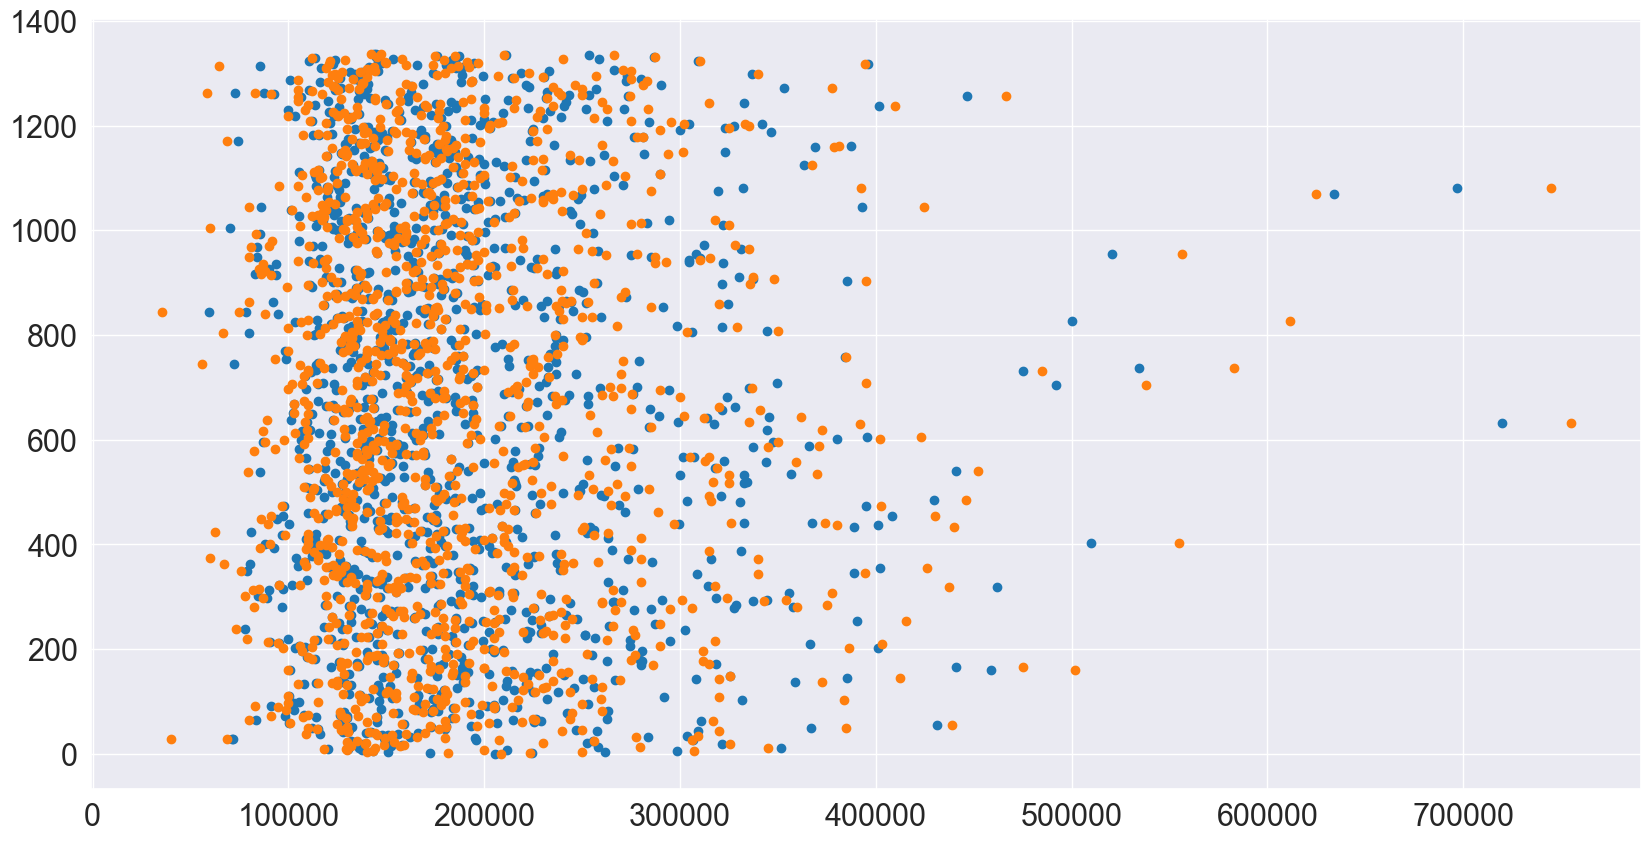

In [775]:
plt.scatter(y_pred,[i for i in range(y_pred.shape[0])])
plt.scatter(y,[i for i in range(y.shape[0])]);
